In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
import lightgbm
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor

In [40]:
data = pd.read_csv('Advertising.csv')


In [41]:
# Display the first few rows of the dataset
print(data.head())

# Check the information about the dataset
print(data.info())

# Summary statistics of the dataset
print(data.describe())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

In [42]:
X = data[['TV', 'Radio', 'Newspaper']]  # Select relevant features for prediction
y = data['Sales']  # Select the target variable to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = model.predict(X_test)


In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3.1740973539761015
R-squared Score: 0.8994380241009121


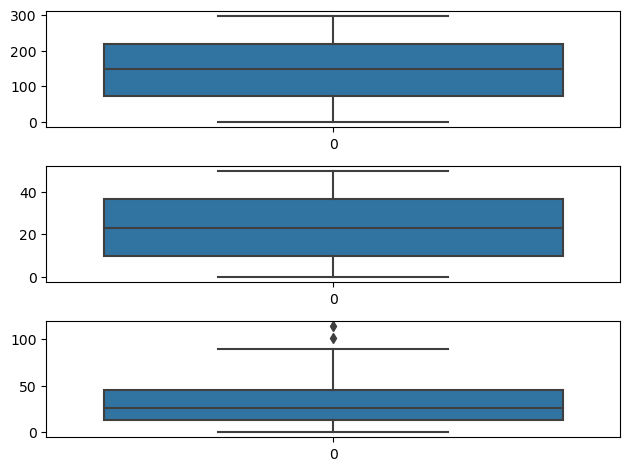

In [46]:
fig,axs = plt.subplots(3)
plt1 = sns.boxplot(data['TV'],ax = axs[0])
plt2 = sns.boxplot(data['Radio'],ax = axs[1])
plt3 = sns.boxplot(data['Newspaper'],ax = axs[2])
plt.tight_layout()

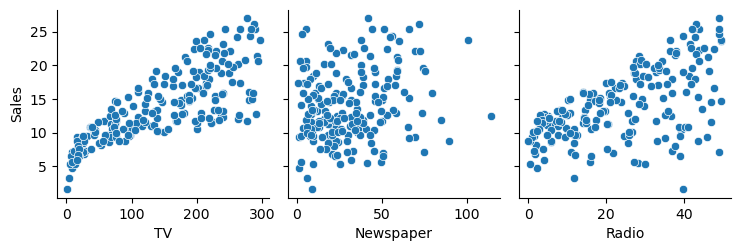

In [47]:
#Data Visualization
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()


<Axes: >

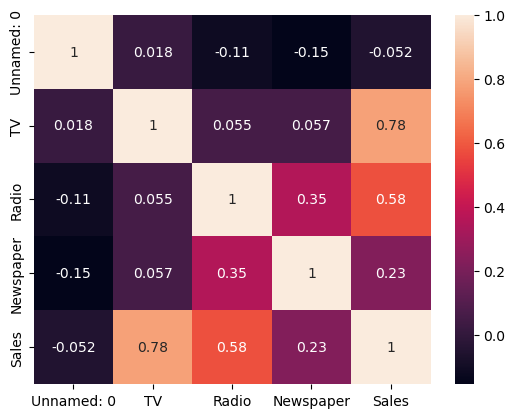

In [48]:
#Correlation coefficient
sns.heatmap(data.corr(),annot=True)

In [49]:
models = [LGBMRegressor(), GradientBoostingRegressor()]
for i in models:
    curr_model = i
    curr_model.fit(X_train, y_train)
    y_test_pred = curr_model.predict(X_test)
    print(i, "Test case R2 score in %: ", r2_score(y_test, y_test_pred) * 100)
    print("\n")

LGBMRegressor() Test case R2 score in %:  97.21683660338833


GradientBoostingRegressor() Test case R2 score in %:  98.34069139549449


